In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


In [2]:
list_nums = [i for i in range(1,1001)]

##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)

In [3]:
df = pd.DataFrame(list_nums, columns = ['x']) 
df.head()

,x
0,1
1,2
2,3
3,4
4,5


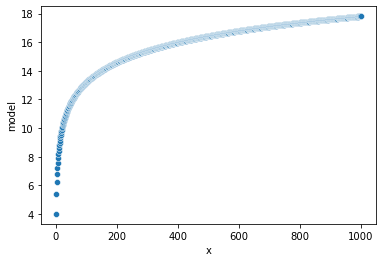

In [57]:
sns.scatterplot(x = 'x', y = 'model', data = df);

In [56]:
B0, B1, epsilon = 1, 2, 3
df['y'] = B0 + B1 * np.log(df['x']) + epsilon

In [57]:
df.head()

,x,y
0,1,4.000000
1,2,5.386294
2,3,6.197225
3,4,6.772589
4,5,7.218876


Quadratic Model

In [61]:
df['x_sq'] = df['x']**2
X, y = df[['x', 'x_sq']], df['y']
lm = LinearRegression()
lm.fit(X, y)
print('Score:', lm.score(X, y))

Score: 0.9009175990291369


Logrithmic model

In [55]:
X_log, y = np.log(df['x'].values.reshape(-1, 1)), df['model']
lm_log = LinearRegression()
lm_log.fit(X_log, y)
print('Score:', lm_log.score(X_log, y))

Score: 1.0


In [48]:
lm_log.coef_

array([4.])

In [50]:
lm_log.intercept_

3.9999999999999893

##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

In [4]:
B0, B1, B2, epsilon = 1, 2, 3, 4

In [5]:
df['y'] = B0 + B1*df['x'] + B2*df['x']**2 + epsilon

In [7]:
X, y = df['x'].values.reshape(-1, 1), df['y']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state = 9)

p = PolynomialFeatures(degree = 2)
X_poly = p.fit_transform(X)
X_poly_test = p.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_poly,y)
print('Train:', lr.score(X_poly, y))
print('Test:', lr.score(X_poly_test, y_test))

Train: 1.0
Test: 1.0



##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC

In [27]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant


In [10]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X_poly_test)
print('mse:', mean_squared_error(y_test, y_pred))

mse: 1.4324743513680088e-18


In [44]:
X, y = df['x'].values.reshape(-1, 1), df['y']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state = 9)

AIC = []
MSE_test = []
MSE_train = []
R_sq = []

for d in range(8):
    p = PolynomialFeatures(degree = d)
    X_poly = p.fit_transform(X)
    X_poly_test = p.fit_transform(X_test)
    X_poly_train = p.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly,y)
    y_pred = lr.predict(X_poly_test)
    y_pred_train = lr.predict(X_poly_train)
    R_sq.append(lr.score(X_poly_test, y_test))
    MSE_test.append(mean_squared_error(y_test, y_pred))
    MSE_train.append(mean_squared_error(y, y_pred_train))
    regr = OLS(y_test, X_poly_test).fit()
    AIC.append(regr.aic)

In [45]:
print(AIC)

[6048.249255691781, 5514.7031435137105, -7820.709526538374, -6079.611197746901, -3169.4160597379923, 525.8545843488498, 1842.1605788154232, 3994.089021744791]


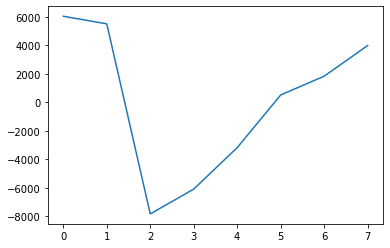

In [51]:
plt.plot(range(8), AIC);

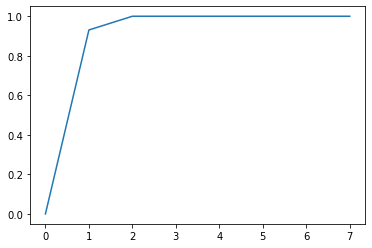

In [50]:
plt.plot(range(8), R_sq);

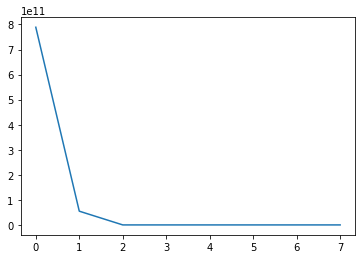

In [52]:
plt.plot(range(8), MSE_test);

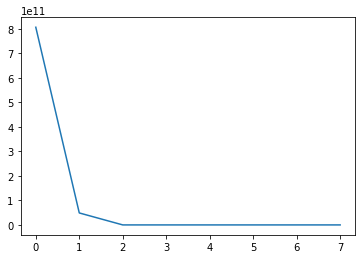

In [53]:
plt.plot(range(8), MSE_train);

##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.



In [55]:
df.head()

,x,y
0,1,10
1,2,21
2,3,38
3,4,61
4,5,90


In [75]:
MSE_test = []
MSE_train = []
for i in range(1, len(df)//5-1):
    train = df[0:i*5]
    test = df[i*5:]
    y_train = train['y'].values.reshape(-1, 1)
    y_test = test['y'].values.reshape(-1, 1)
    X_train = train['x'].values.reshape(-1, 1)
    X_test = test['x'].values.reshape(-1, 1)
    
    p = PolynomialFeatures(degree = 2)
    X_poly_test = p.fit_transform(X_test)
    X_poly_train = p.fit_transform(X_train)
    lr = LinearRegression()
    lr.fit(X_poly_train,y_train)
    y_pred = lr.predict(X_poly_test)
    y_pred_train = lr.predict(X_poly_train)
    MSE_test.append(mean_squared_error(y_test, y_pred))
    MSE_train.append(mean_squared_error(y_train, y_pred_train))

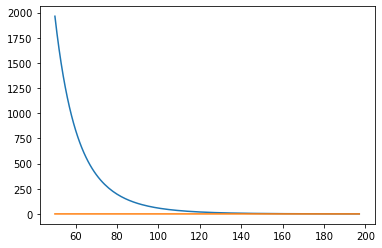

In [81]:
plt.plot(range(50,198), MSE_test[50:]);
plt.plot(range(50,198), MSE_train[50:]);

In [82]:
df.head()

,x,y
0,1,4.000000
1,2,5.386294
2,3,6.197225
3,4,6.772589
4,5,7.218876


In [ ]:
!pwd
